### **1.1. Imports and data loading**

Start by importing packages needed to build the decision tree to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import pandas as pd

# Import packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Import packages for data modeling
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Load the data from the data file into a dataframe.

In [2]:
# Load dataset into dataframe
data = pd.read_csv('breast_cancer.csv')

### **1.2. Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape

(569, 33)

Get basic information about the dataset.

In [5]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Drop irrelevant columns

In [6]:
data = data.drop(['Unnamed: 32', 'id'], axis=1)

Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Check for and handle missing values

In [8]:
# Check for missing values
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Comment:** 

Check for and handle duplicates

In [9]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

**Comment:** 

**Comment:** Decision tree is robust to outliers, so there is no need to impute or drop any values based on where they fall in their distribution.

Check class balance.

In [10]:
# Check class balance
data["diagnosis"].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

**Comment:**

### **1.3. Feature selection and transformation**

### **2.1. Preparing training and test datasets**

Visualize the class distribution in the original dataset

Text(0, 0.5, 'Count')

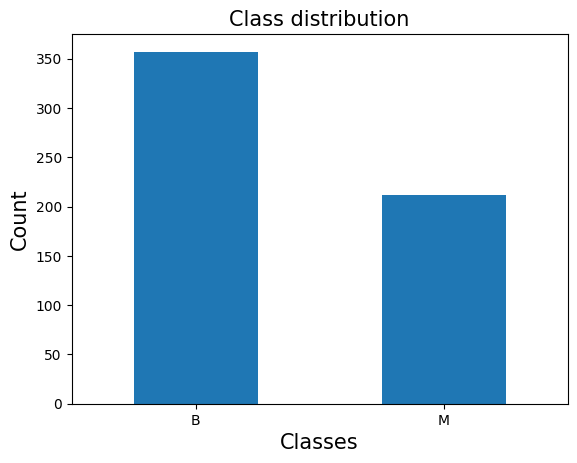

In [11]:
data["diagnosis"].value_counts(sort=True).plot(kind='bar')
plt.title('Class distribution', fontsize = 15)
plt.xlabel('Classes', fontsize = 15)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize = 15)

Assign target variable.

**Note:**
In this case, the target variable is `label_column`.
* 0 represents ...
* 1 represents ...

In [12]:
# Isolate label variable
label = data['diagnosis']

Isolate the features.

In [13]:
# Isolate features
feature_df = data.drop(['diagnosis'], axis=1)

# Display first few rows of features dataframe
feature_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# Functions for visualizing class distributions in training and test sets
def visualize_distributions(y_train, y_test):
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    for idx, group in enumerate([('Train', y_train), ('Test', y_test)]):
        data = group[1].value_counts()
        sns.barplot(ax=ax[idx], x=data.index, y=data.values)
        ax[idx].set_title(f'{group[0]} Label Count')
        ax[idx].set_xlabel(f'{group[0]} Labels')
        ax[idx].set_ylabel('Count')

    plt.show()

Split data with train/test ratio: 40/60

In [15]:
feature_train_1, feature_test_1, label_train_1, label_test_1 = train_test_split(feature_df, label, test_size=0.6, random_state=0, shuffle=True, stratify=label)

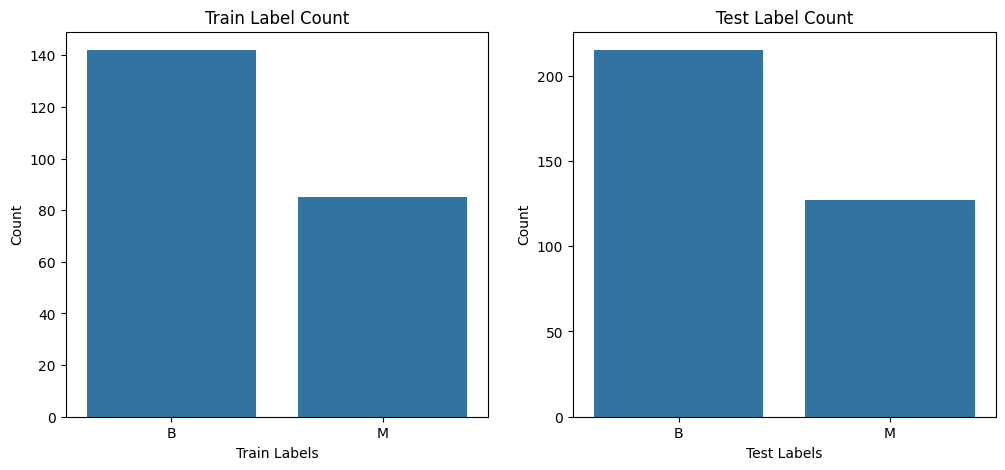

In [16]:
# Visualize the class distributions in the training set and test set
visualize_distributions(label_train_1, label_test_1)

Split data with train/test ratio: 60/40

In [17]:
feature_train_2, feature_test_2, label_train_2, label_test_2 = train_test_split(feature_df, label, test_size=0.4, random_state=0, shuffle=True, stratify=label)

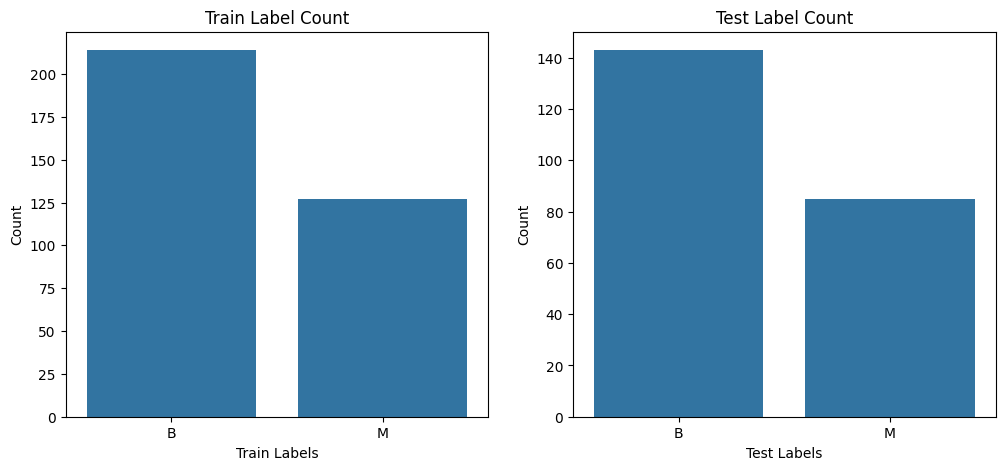

In [18]:
# Visualize the class distributions in the training set and test set
visualize_distributions(label_train_2, label_test_2)

Split data with train/test ratio: 80/20

In [19]:
feature_train_3, feature_test_3, label_train_3, label_test_3 = train_test_split(feature_df, label, test_size=0.2, random_state=0, shuffle=True, stratify=label)

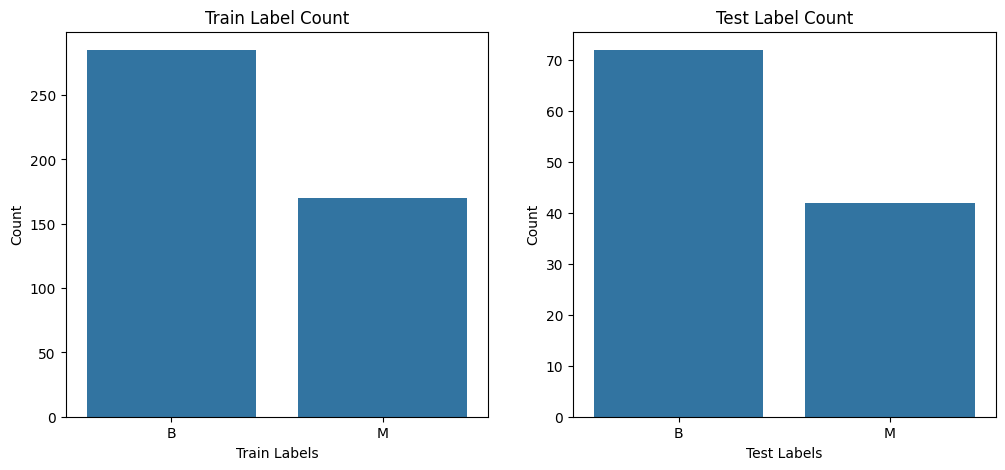

In [20]:
# Visualize the class distributions in the training set and test set
visualize_distributions(label_train_3, label_test_3)

Split data with train/test ratio: 90/10

In [21]:
feature_train_4, feature_test_4, label_train_4, label_test_4 = train_test_split(feature_df, label, test_size=0.1, random_state=0, shuffle=True, stratify=label)

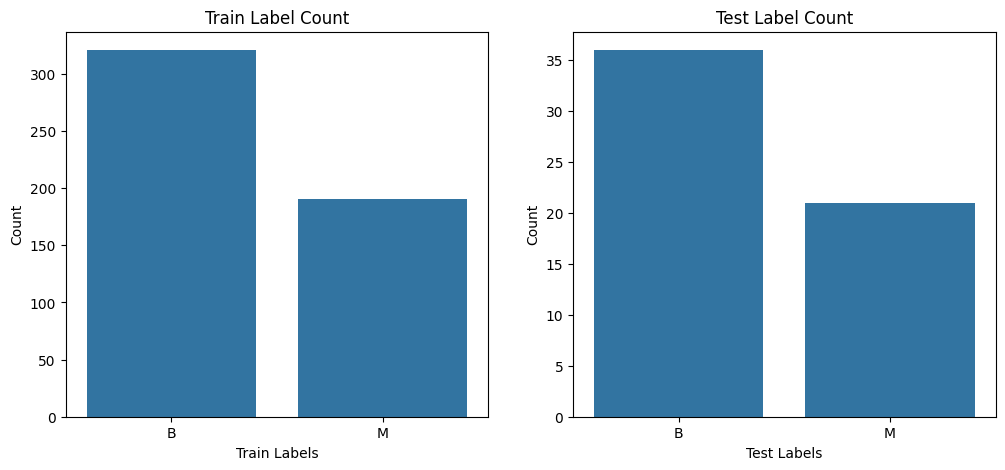

In [22]:
# Visualize the class distributions in the training set and test set
visualize_distributions(label_train_4, label_test_4)

### **2.2. Building and Visualizing the Decision Tree Classifiers**

For the the dataset 1 (40/60)

In [23]:
# Instantiate the model
decision_tree_1 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the model to training data
decision_tree_1.fit(feature_train_1, label_train_1)

DecisionTreeClassifier(criterion='entropy', random_state=0)

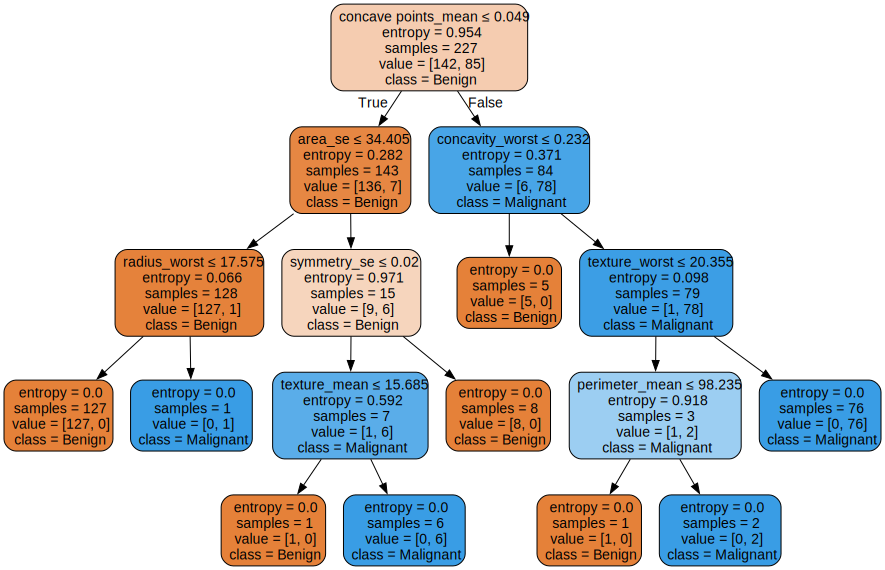

In [24]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_1,
                feature_names=feature_train_1.columns,
                class_names=['Benign', 'Malignant'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)
graph

For the dataset 2 (60/40)

In [25]:
# Instantiate the model
decision_tree_2 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the model to training data
decision_tree_2.fit(feature_train_2, label_train_2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

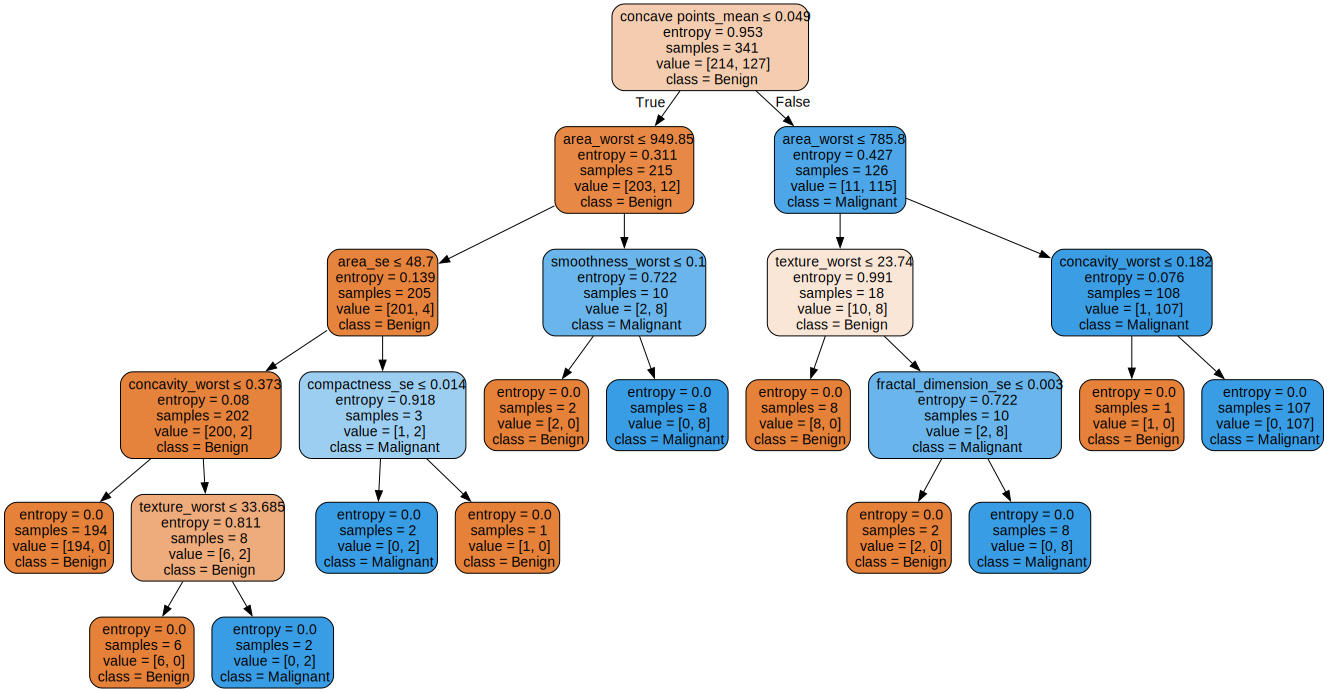

In [26]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_2,
                feature_names=feature_train_2.columns,
                class_names=['Benign', 'Malignant'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)
graph

For the dataset 3 (80/20)

In [27]:
# Instantiate the model
decision_tree_3 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the model to training data
decision_tree_3.fit(feature_train_3, label_train_3)

DecisionTreeClassifier(criterion='entropy', random_state=0)

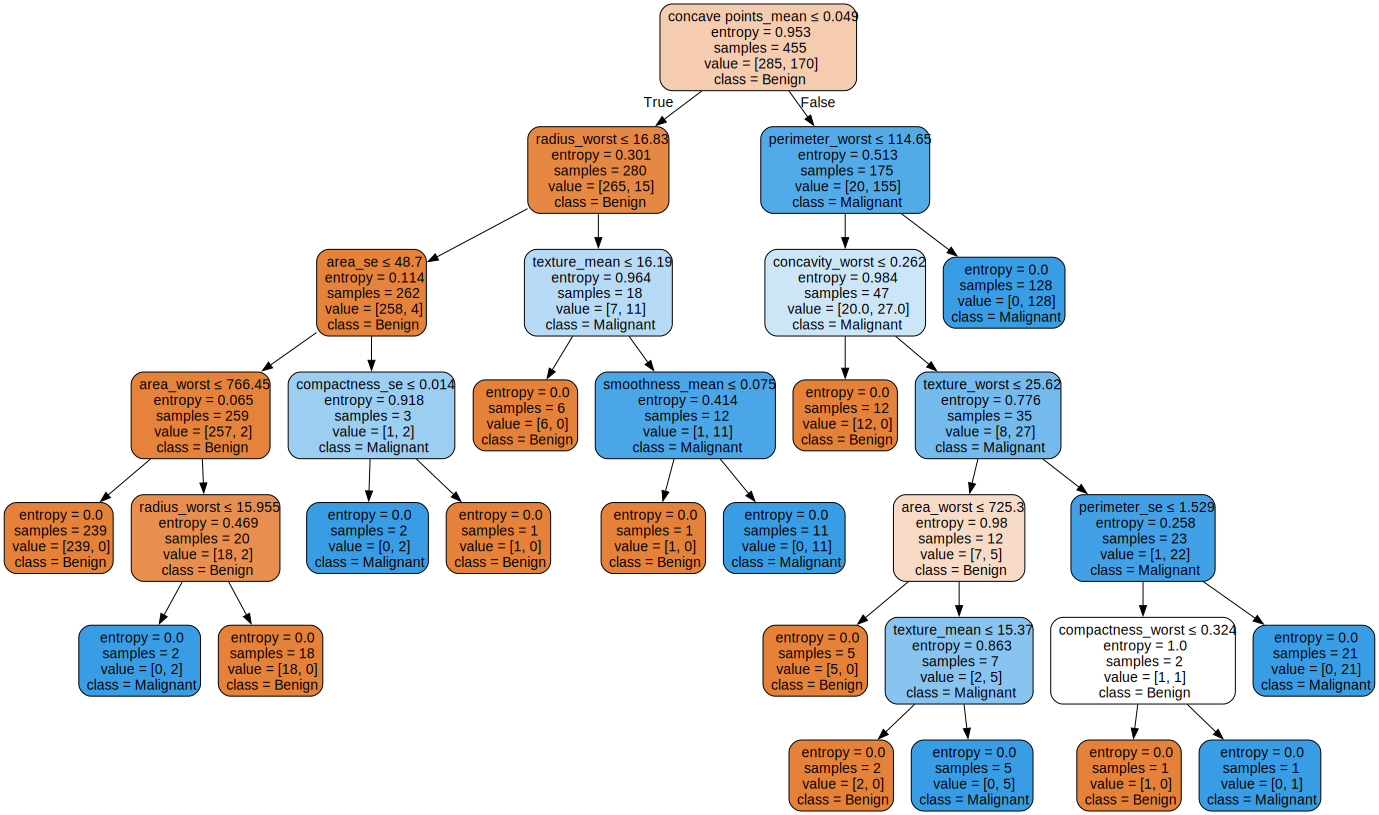

In [28]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_3,
                feature_names=feature_train_3.columns,
                class_names=['Benign', 'Malignant'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)
graph

For the dataset 4 (90/10)

In [29]:
# Instantiate the model
decision_tree_4 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the model to training data
decision_tree_4.fit(feature_train_4, label_train_4)

DecisionTreeClassifier(criterion='entropy', random_state=0)

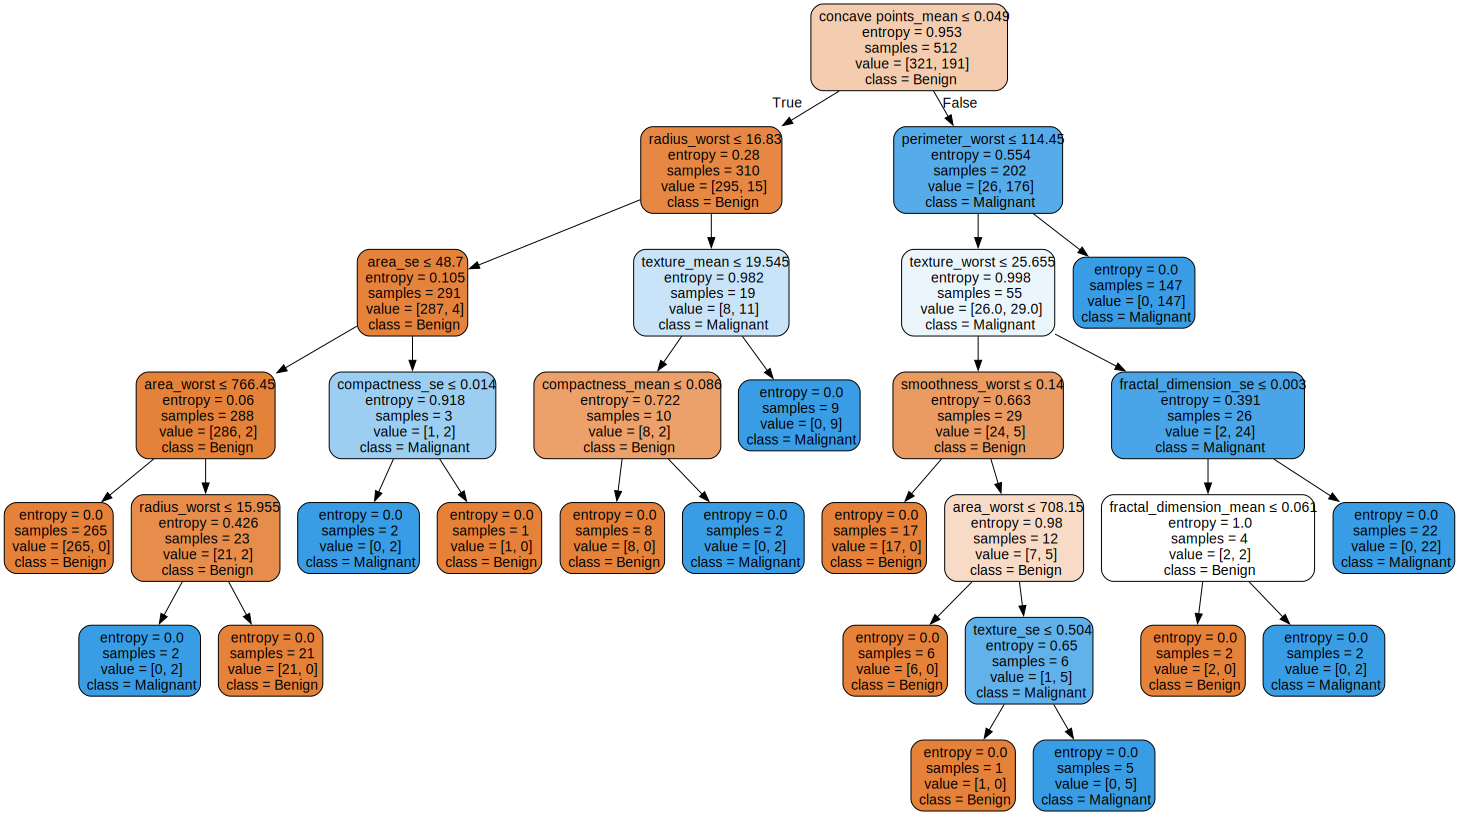

In [30]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_4,
                feature_names=feature_train_4.columns,
                class_names=['Benign', 'Malignant'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)
graph

### **2.3. Evaluating the decision tree classifiers**

Function for plotting the confusion matrix

In [31]:
def conf_matrix_plot(model, y_pred, y_data, display_labels):
    '''
    Accepts as argument model object, y_pred, and y data (label test). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 

    cm = confusion_matrix(y_data, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=display_labels)
  
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

For the dataset 1 (40/60)

In [32]:
label_pred_1 = decision_tree_1.predict(feature_test_1)

In [33]:
# Create the classification report
target_labels = ['B', 'M']
print(classification_report(label_test_1, label_pred_1, target_names=target_labels))

              precision    recall  f1-score   support

           B       0.95      0.94      0.95       215
           M       0.90      0.92      0.91       127

    accuracy                           0.93       342
   macro avg       0.93      0.93      0.93       342
weighted avg       0.93      0.93      0.93       342



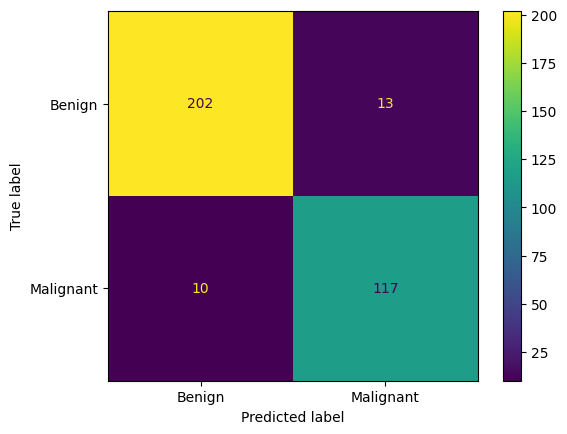

In [34]:
# Create the confusion matrix
display_labels = ['Benign', 'Malignant']
conf_matrix_plot(decision_tree_1, label_pred_1, label_test_1, display_labels)

For the dataset 2 (60/40)

In [35]:
label_pred_2 = decision_tree_2.predict(feature_test_2)

In [36]:
# Create the classification report
target_labels = ['B', 'M']
print(classification_report(label_test_2, label_pred_2, target_names=target_labels))

              precision    recall  f1-score   support

           B       0.96      0.92      0.94       143
           M       0.88      0.94      0.91        85

    accuracy                           0.93       228
   macro avg       0.92      0.93      0.93       228
weighted avg       0.93      0.93      0.93       228



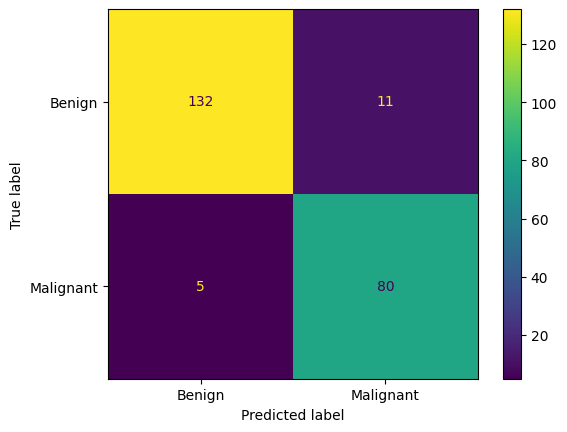

In [37]:
# Create the confusion matrix
display_labels = ['Benign', 'Malignant']
conf_matrix_plot(decision_tree_2, label_pred_2, label_test_2, display_labels)

For the dataset 3 (80/20)

In [38]:
label_pred_3 = decision_tree_3.predict(feature_test_3)

In [62]:
# Create the classification report
target_labels = ['B', 'M']
print(classification_report(label_test_3, label_pred_3, target_names=target_labels))

              precision    recall  f1-score   support

           B       0.97      0.96      0.97        72
           M       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



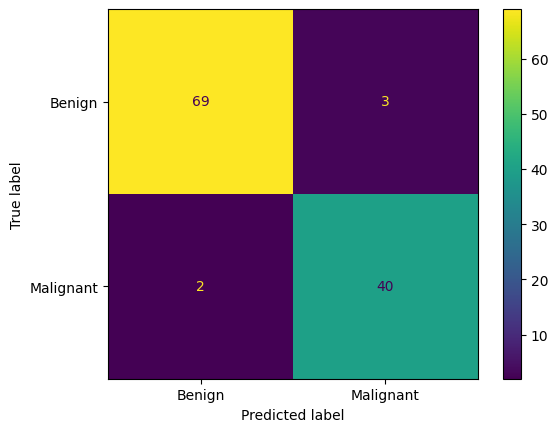

In [40]:
# Create the confusion matrix
display_labels = ['Benign', 'Malignant']
conf_matrix_plot(decision_tree_3, label_pred_3, label_test_3, display_labels)

For the dataset 4 (90/10)

In [41]:
label_pred_4 = decision_tree_4.predict(feature_test_4)

In [42]:
# Create the classification report
target_labels = ['B', 'M']
print(classification_report(label_test_4, label_pred_4, target_names=target_labels))

              precision    recall  f1-score   support

           B       0.94      0.94      0.94        36
           M       0.90      0.90      0.90        21

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



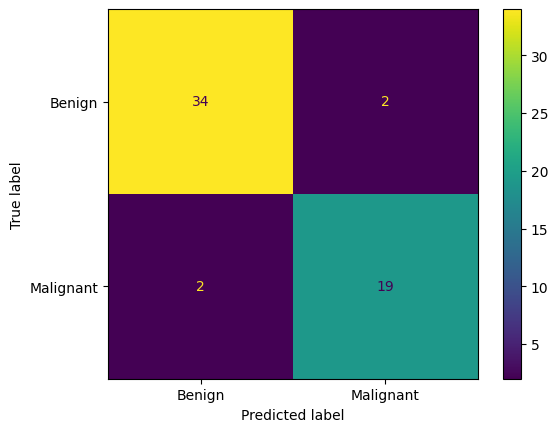

In [43]:
# Create the confusion matrix
display_labels = ['Benign', 'Malignant']
conf_matrix_plot(decision_tree_4, label_pred_4, label_test_4, display_labels)

### **2.4. The depth and accuracy of a decision tree**

This task focuses on the 80/20 training and test sets

In [44]:
feature_train = feature_train_3.copy()
feature_test = feature_test_3.copy()
label_train = label_train_3.copy()
label_test = label_test_3.copy()

accuracy_scores = []

In [45]:
def evaluate_decision_tree(feature_train, label_train, feature_test, label_test, max_depth):
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=0)
    dt.fit(feature_train, label_train)
    label_pred = dt.predict(feature_test)
    acc_score = accuracy_score(y_true=label_test, y_pred=label_pred)
    dot_data = export_graphviz(dt,
                feature_names=feature_train.columns,
                class_names=['Benign', 'Malignant'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
    graph = graphviz.Source(dot_data)

    return acc_score, graph


When `max_depth` = None:

In [46]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, None)
accuracy_scores.append(acc_score)

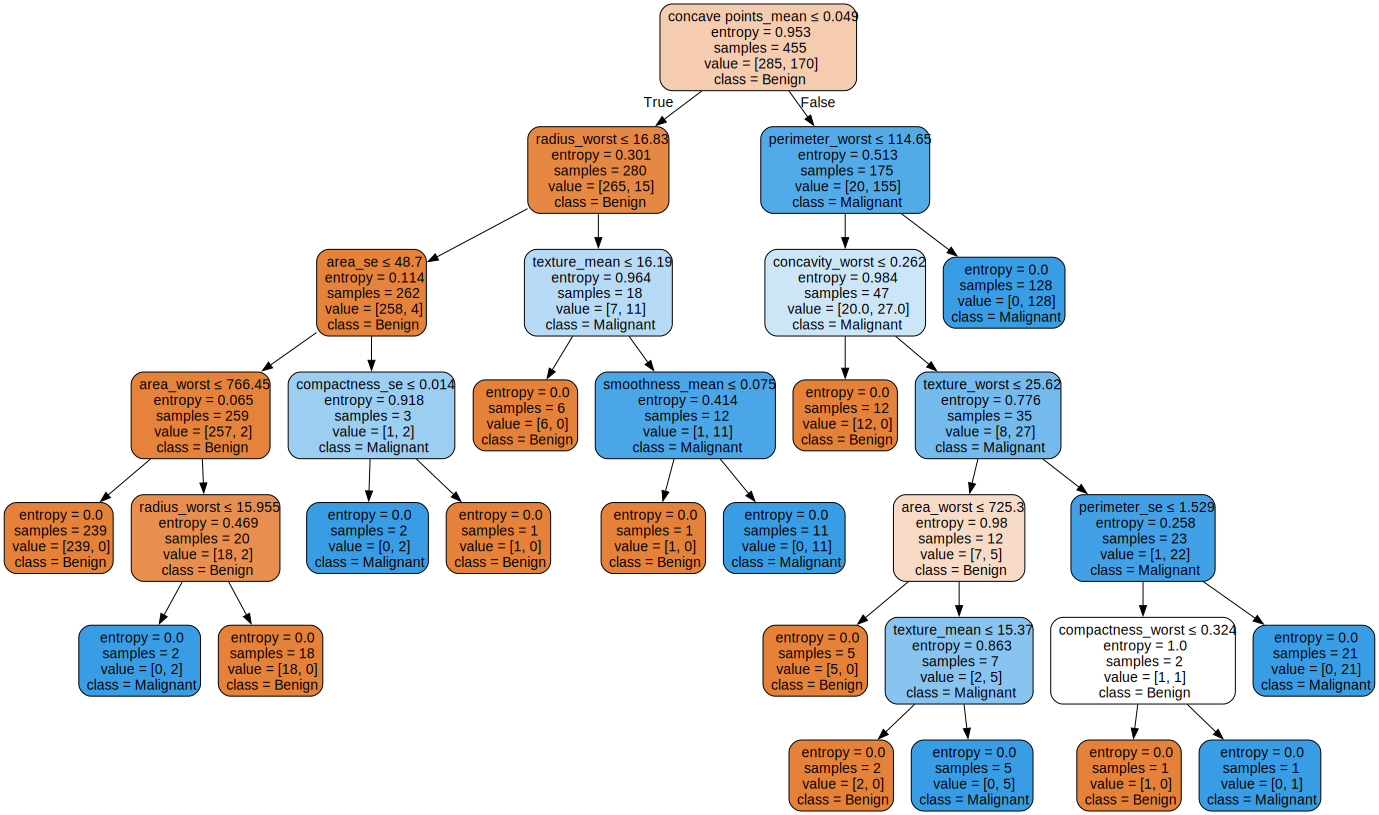

In [47]:
graph

When `max_depth` = 2:

In [48]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 2)
accuracy_scores.append(acc_score)

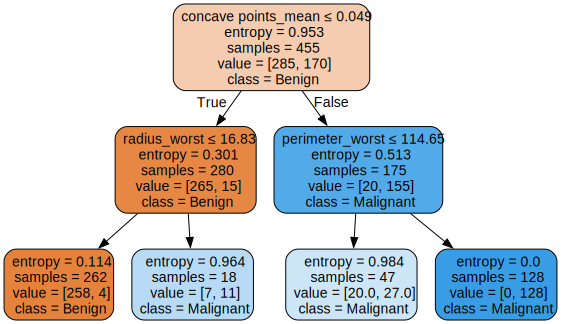

In [49]:
graph

When `max_depth` = 3:

In [50]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 3)
accuracy_scores.append(acc_score)

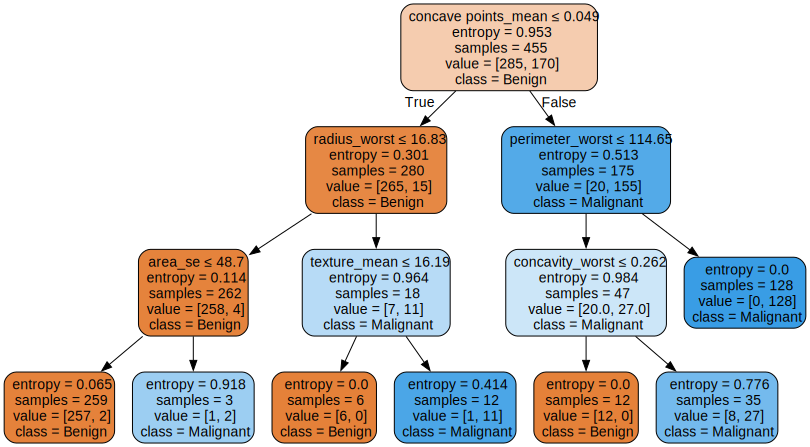

In [51]:
graph

When `max_depth` = 4:

In [52]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 4)
accuracy_scores.append(acc_score)

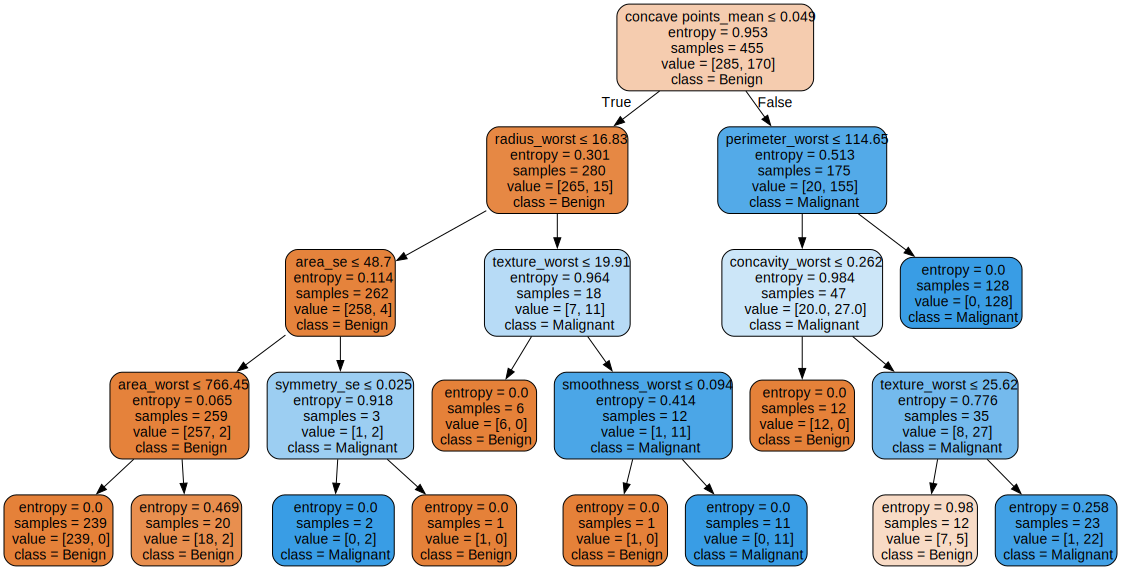

In [53]:
graph

When `max_depth` = 5:

In [54]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 5)
accuracy_scores.append(acc_score)

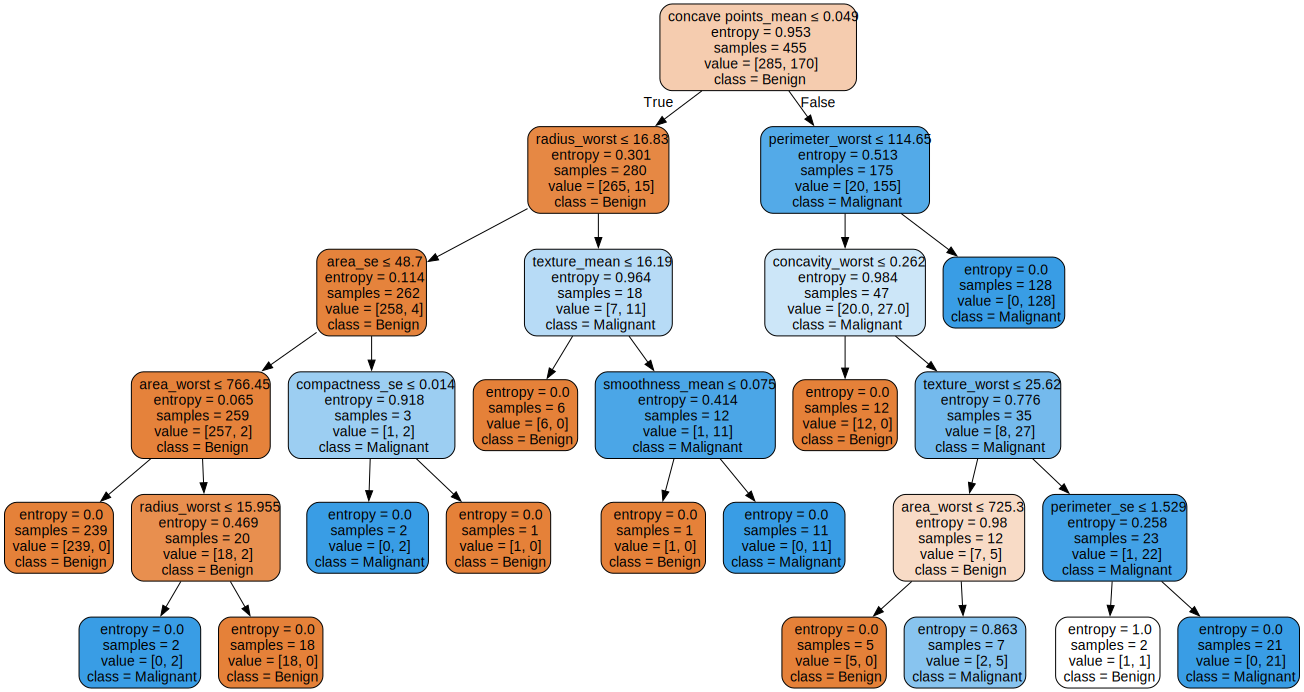

In [55]:
graph

When `max_depth` = 6:

In [56]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 6)
accuracy_scores.append(acc_score)

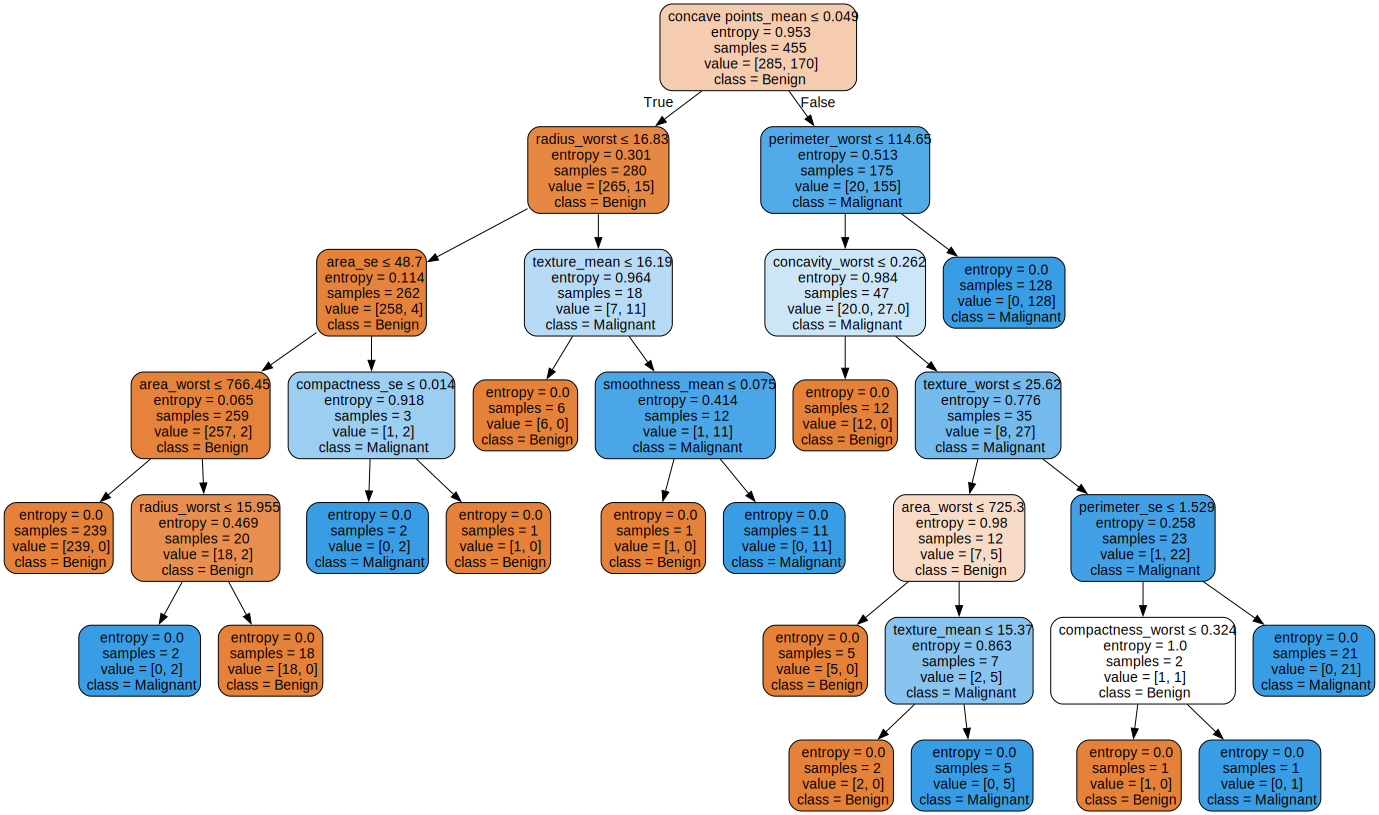

In [57]:
graph

When `max_depth` = 7:

In [58]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 7)
accuracy_scores.append(acc_score)

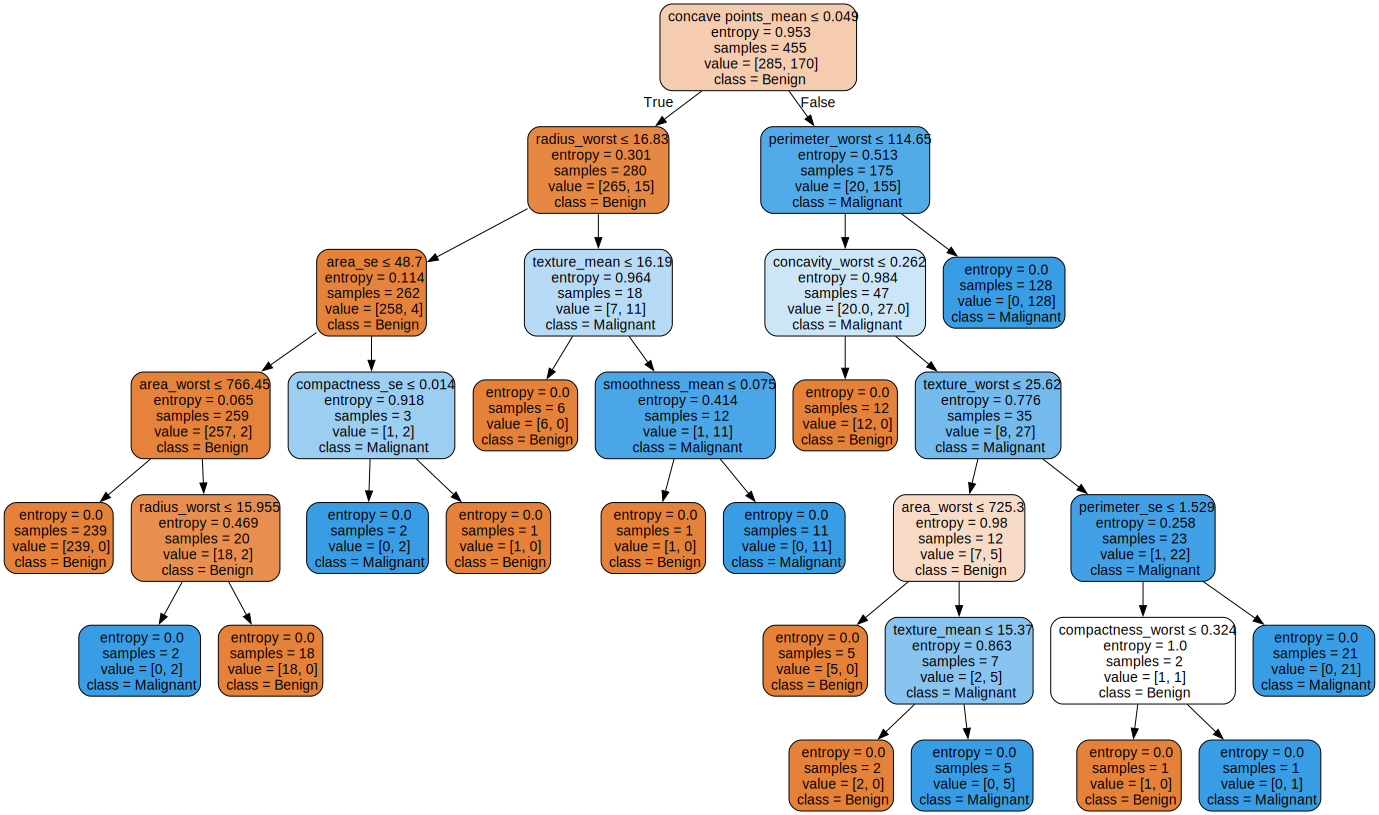

In [59]:
graph

Report the `accuracy_score` (on the test set) of the decision tree classifier for each value of
the `max_depth` parameter in a table

In [60]:
max_depth_values = ['None', 2, 3, 4, 5, 6, 7]
accuracy_table = pd.DataFrame({
    'max_depth': max_depth_values,
    'Accuracy': accuracy_scores
})
accuracy_table

,max_depth,Accuracy
0,None,0.956140
1,2,0.885965
2,3,0.938596
3,4,0.964912
4,5,0.956140
5,6,0.956140
6,7,0.956140


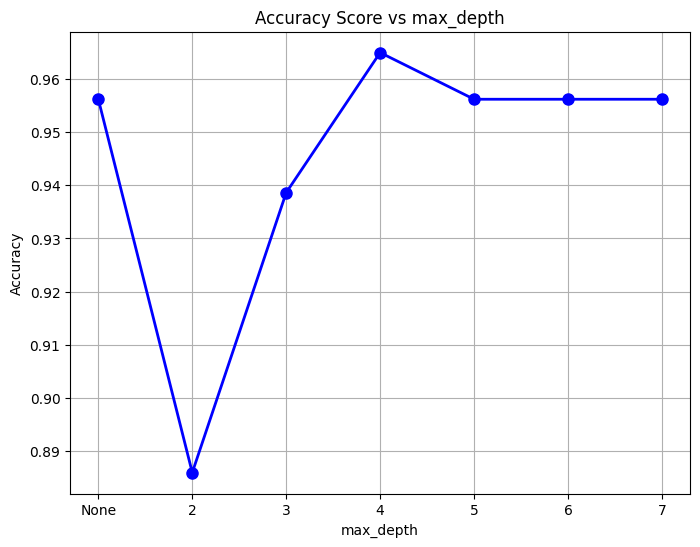

In [61]:
# Plot the accuracy scores
tickvalues = range(0,len(max_depth_values))

plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, accuracy_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Accuracy Score vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(ticks=tickvalues, labels=max_depth_values)
plt.show()

**Insights:**